In [1]:
#Importing the library
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

#import imblearn
#from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the training and testing data
df_train = pd.read_csv('E:/Data Science/NBFC Loan Default/Train_set_(1)_(1).csv')
df_test = pd.read_csv('E:/Data Science/NBFC Loan Default/Test_set_(1)_(2).csv')

# Data Exploration

In [3]:
#Checking the first 5 rows
df_train.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [4]:
#Checking the shape
df_train.shape

(93174, 23)

In [5]:
#Checking the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

# Data Cleaning 

In [7]:
#Checking duplicate values
df_train.duplicated().sum()

0

In [8]:
#Checking missing values
df_train.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [9]:
df_train = df_train.dropna()

In [10]:
#Relacing missing values
#df_train['job_experience'] = df_train['job_experience'].fillna(df_train['job_experience'].mode()[0])
#df_train['annual_income'] = df_train['annual_income'].fillna(df_train['annual_income'].mean())
#df_train['delinq_2yrs'] = df_train['delinq_2yrs'].fillna(df_train['delinq_2yrs'].mean())
#df_train['public_records'] = df_train['public_records'].fillna(df_train['public_records'].mean())
#df_train['total_acc'] = df_train['total_acc'].fillna(df_train['total_acc'].mean())
#df_train['last_week_pay'] = df_train['last_week_pay'].fillna(df_train['last_week_pay'].mean())
#df_train['total_current_balance'] = df_train['total_current_balance'].fillna(df_train['total_current_balance'].mean())
#df_train['total_revolving_limit'] = df_train['total_revolving_limit'].fillna(df_train['total_revolving_limit'].mean())

In [11]:
#dropping the ID column
df_train = df_train.drop('ID',axis=1)

# EDA

<Axes: >

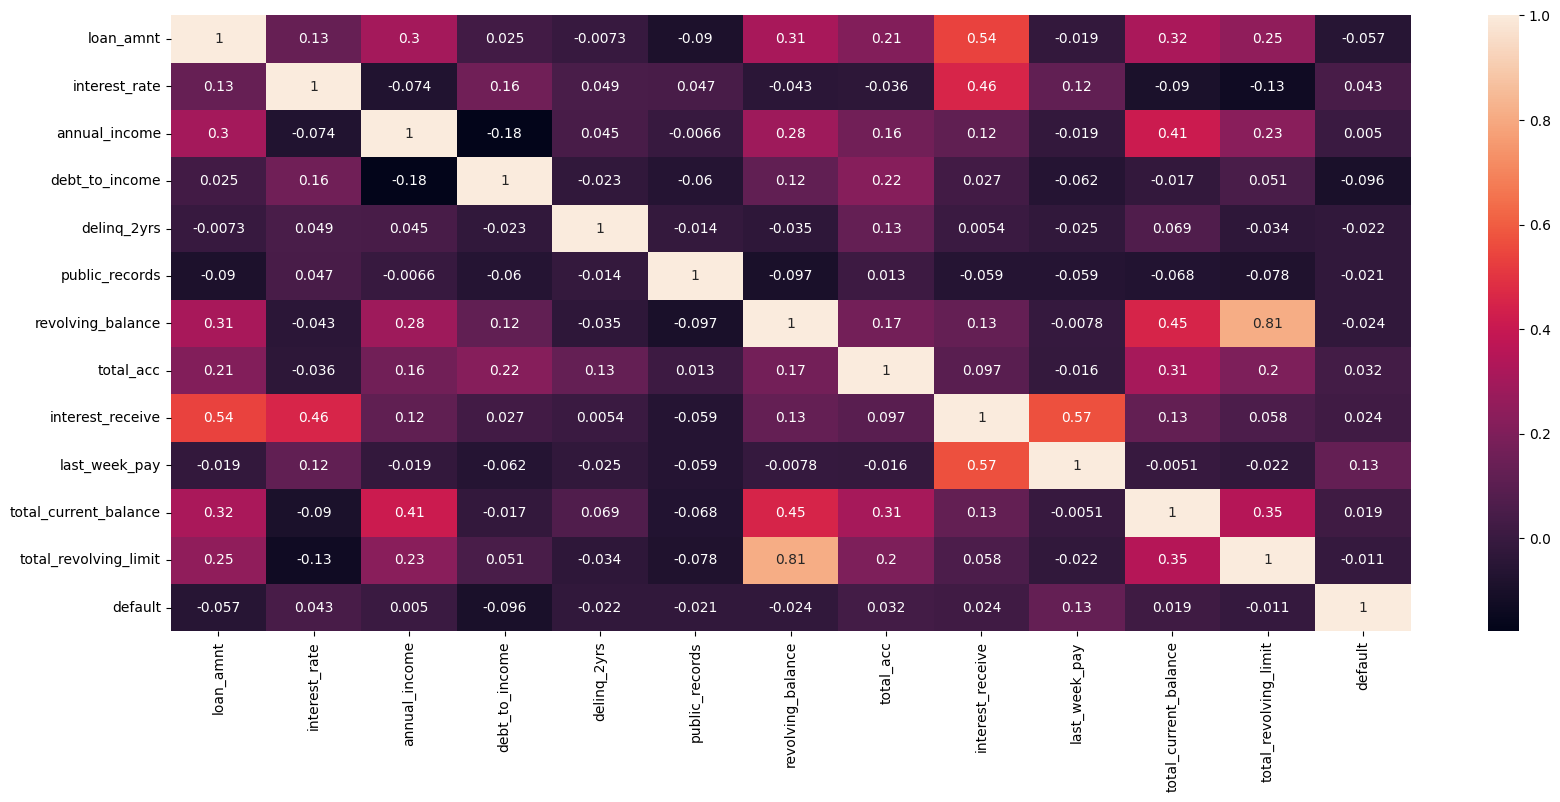

In [199]:
plt.figure(figsize=(20,8))
sns.heatmap(df_train.corr(),annot=True)

High correlation between revolving_balance and total_revolving_limit . So we can remove total_revolving_limit.

In [12]:
#Dropping total_revolving_limit
df_train = df_train.drop('total_revolving_limit',axis=1)
df_test = df_test.drop('total_revolving_limit',axis=1)

<Axes: ylabel='default'>

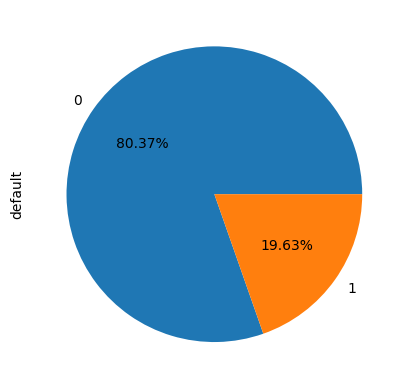

In [201]:
#Checking distribution of target variable
df_train['default'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [13]:
#Chi Square test for all categorical variable
cat_col = ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose',
           'state_code','application_type']
for col in cat_col:
    cross_tab = pd.crosstab(df_train[col],df_train['default'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    
    if p < 0.05:
        print('For',col,': p =',p,',Since p < 0.05, There is a relationship between',col,'and default.')
    else:
        print('For',col,': p =',p,',Since p > 0.05, There is no relationship between',col,'and default.')

For loan_term : p = 1.5688155238032574e-202 ,Since p < 0.05, There is a relationship between loan_term and default.
For loan_grade : p = 2.9744561814359166e-26 ,Since p < 0.05, There is a relationship between loan_grade and default.
For loan_subgrade : p = 2.475696268829298e-28 ,Since p < 0.05, There is a relationship between loan_subgrade and default.
For job_experience : p = 2.440651222192647e-05 ,Since p < 0.05, There is a relationship between job_experience and default.
For home_ownership : p = 3.5073432735950865e-13 ,Since p < 0.05, There is a relationship between home_ownership and default.
For income_verification_status : p = 2.571532007983427e-144 ,Since p < 0.05, There is a relationship between income_verification_status and default.
For loan_purpose : p = 1.140268572147307e-09 ,Since p < 0.05, There is a relationship between loan_purpose and default.
For state_code : p = 3.921778459958216e-42 ,Since p < 0.05, There is a relationship between state_code and default.
For applica

In [14]:
#Calculating the number of outlier in each feature of the dataset
des = df_train.describe()
for col in des.columns:
    q1 = des.loc['25%',col]
    q3 = des.loc['75%',col]
    iqr = q3-q1
    upper_fence = q3 + 1.5*iqr
    lower_fence = q1 -1.5*iqr
    print("Number of outlier in", col ,"feature is", 
          len(df_train[col][(df_train[col]>upper_fence) | (df_train[col]<lower_fence)]))

Number of outlier in loan_amnt feature is 0
Number of outlier in interest_rate feature is 470
Number of outlier in annual_income feature is 4037
Number of outlier in debt_to_income feature is 2
Number of outlier in delinq_2yrs feature is 15925
Number of outlier in public_records feature is 12381
Number of outlier in revolving_balance feature is 4237
Number of outlier in total_acc feature is 1722
Number of outlier in interest_receive feature is 5695
Number of outlier in last_week_pay feature is 138
Number of outlier in total_current_balance feature is 2690
Number of outlier in default feature is 15609


In [15]:
#Imputing outliers 
des1 = df_train.describe()
columns=['interest_rate','annual_income','debt_to_income','delinq_2yrs','public_records','revolving_balance','total_acc','interest_receive',
         'last_week_pay','total_current_balance']
for col in columns:
    q1 = des1.loc['25%',col]
    q3 = des1.loc['75%',col]
    iqr = q3-q1
    upper_fence = q3 + 1.5*iqr
    lower_fence = q1 -1.5*iqr
    df_include = df_train.loc[(df_train[col] >= lower_fence) & (df_train[col] <= upper_fence)]
    mean = df_include[col].mean()
    df_train[col]=np.where(df_train[col]>upper_fence,upper_fence,df_train[col])
    df_train[col]=np.where(df_train[col] < lower_fence, lower_fence,df_train[col])
    print("Number of outlier after imputing outlier with mean in", col ,"feature is", 
          len(df_train[col][(df_train[col]>upper_fence) | (df_train[col]<lower_fence)]))

Number of outlier after imputing outlier with mean in interest_rate feature is 0
Number of outlier after imputing outlier with mean in annual_income feature is 0
Number of outlier after imputing outlier with mean in debt_to_income feature is 0
Number of outlier after imputing outlier with mean in delinq_2yrs feature is 0
Number of outlier after imputing outlier with mean in public_records feature is 0
Number of outlier after imputing outlier with mean in revolving_balance feature is 0
Number of outlier after imputing outlier with mean in total_acc feature is 0
Number of outlier after imputing outlier with mean in interest_receive feature is 0
Number of outlier after imputing outlier with mean in last_week_pay feature is 0
Number of outlier after imputing outlier with mean in total_current_balance feature is 0


# Data Preparation

In [16]:
df_train = df_train.drop(['state_code','loan_grade'],axis=1)

In [17]:
cat_col = ['loan_term','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','application_type']

In [18]:
df_train = pd.get_dummies(data=df_train, columns=cat_col)

In [19]:
x=df_train.drop('default',axis=1)
y=df_train['default']

In [20]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [22]:
# Resampling the minority class
#sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
#x_train_sample,y_train_sample = sm.fit_resample(x_train, y_train)

In [39]:
pd.get_dummies(y)

,0,1
0,1,0
1,1,0
2,1,0
4,1,0
5,1,0
...,...,...
93168,1,0
93169,1,0
93171,1,0
93172,0,1


# Testing Data Preparation

In [24]:
#Relacing missing values
df_test['job_experience'] = df_test['job_experience'].fillna(df_test['job_experience'].mode()[0])
df_test['annual_income'] = df_test['annual_income'].fillna(df_test['annual_income'].mean())
df_test['delinq_2yrs'] = df_test['delinq_2yrs'].fillna(df_test['delinq_2yrs'].mean())
df_test['public_records'] = df_test['public_records'].fillna(df_test['public_records'].mean())
df_test['total_acc'] = df_test['total_acc'].fillna(df_test['total_acc'].mean())
df_test['last_week_pay'] = df_test['last_week_pay'].fillna(df_test['last_week_pay'].mean())
df_test['total_current_balance'] = df_test['total_current_balance'].fillna(df_test['total_current_balance'].mean())

In [25]:
x_sample = df_test.drop(['ID','state_code','loan_grade'],axis=1)

In [26]:
x_sample = pd.get_dummies(data=x_sample, columns=cat_col)

In [27]:
x_sample = sc.fit_transform(x_sample)

# Model Training

In [218]:
#Creating function to trained the model
def train_test(model, x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print('\nTraining Accuracy: ',model.score(x_train,y_train))
    print('Testing Accuracy: ',model.score(x_test,y_test))
    
    
    print('\nConfusion matrix for training set:\n')
    model_cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(model_cm_train, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print('\nConfusion matrix for testing set:\n')
    model_cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(model_cm_test, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('************************************************************************')
    print('\nClassification report for Training set:\n')
    print(classification_report(y_train,y_train_pred))
    
    print('\nClassification report for Testing set:\n')
    print(classification_report(y_test,y_test_pred))
    print('************************************************************************')


In [219]:
#Function for Hyperparameter Tunning
def hyperparameter_tunning(model,x_train,y_train,params):
  cv = StratifiedKFold(n_splits=10)
  grid_search = GridSearchCV(estimator=model,param_grid=params)
  result = grid_search.fit(x_train, y_train)
  print("Best Score: " , result.best_score_)
  print("Best Parameter:",result.best_params_)
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    if param == result.best_params_:
      print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))
  return result.best_params_

Logistic Regression


Training Accuracy:  0.8313160211267606
Testing Accuracy:  0.8295504558314996

Confusion matrix for training set:



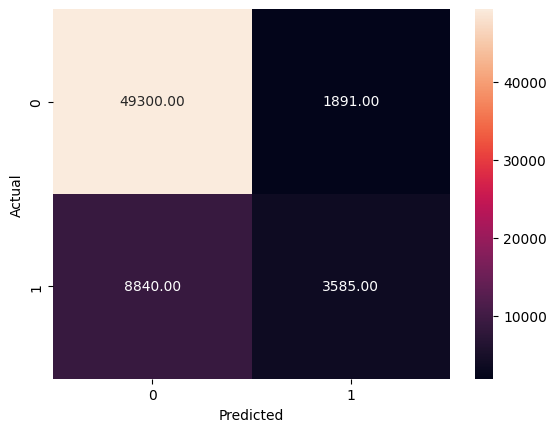


Confusion matrix for testing set:



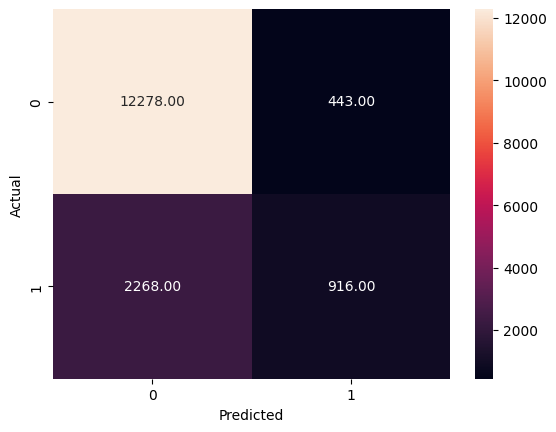

************************************************************************

Classification report for Training set:

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     51191
           1       0.65      0.29      0.40     12425

    accuracy                           0.83     63616
   macro avg       0.75      0.63      0.65     63616
weighted avg       0.81      0.83      0.80     63616


Classification report for Testing set:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     12721
           1       0.67      0.29      0.40      3184

    accuracy                           0.83     15905
   macro avg       0.76      0.63      0.65     15905
weighted avg       0.81      0.83      0.80     15905

************************************************************************


In [220]:
#Model Training 
lr = LogisticRegression()
train_test(lr,x_train, y_train, x_test, y_test)

In [221]:
ypred = lr.predict(x_sample)

In [231]:
df_test['default'] = ypred

In [235]:
sub = df_test[['ID','default']]

In [239]:
sub.to_csv('submission.csv',index=False)

In [237]:
df_test

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,default
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.000000,128098.0,1
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.000000,269396.0,0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.000000,220135.0,1
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.000000,39436.0,0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.000000,52764.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,3 years,8.18,B,B1,10+ years,MORTGAGE,65000.0,Source Verified,...,13.09,0.0,5.0,6731,24.0,187.27,INDIVIDUAL,26.000000,14422.0,0
39929,59742362,1800,3 years,11.53,B,B5,6-10 years,MORTGAGE,55000.0,Source Verified,...,25.44,0.0,1.0,11092,38.0,81.24,INDIVIDUAL,26.000000,243469.0,0
39930,72657145,15200,3 years,13.44,C,C3,10+ years,MORTGAGE,78000.0,Not Verified,...,19.40,0.0,0.0,19688,26.0,0.00,INDIVIDUAL,58.418177,145370.0,0
39931,15220189,14425,5 years,18.92,D,D4,<5 Years,MORTGAGE,38000.0,Not Verified,...,17.40,0.0,1.0,10805,29.0,4268.80,INDIVIDUAL,96.000000,106449.0,0


# Training Neural Networks

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=264,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=128,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [37]:
model.fit(x_train,y_train.values,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
796/796 [==============================] - 3s 4ms/step - loss: 0.4099 - accuracy: 0.0000e+00 - val_loss: 0.4060 - val_accuracy: 0.0000e+00
Epoch 2/100
796/796 [==============================] - 3s 4ms/step - loss: 0.3985 - accuracy: 3.9299e-05 - val_loss: 0.3877 - val_accuracy: 0.0000e+00
Epoch 3/100
796/796 [==============================] - 3s 4ms/step - loss: 0.3870 - accuracy: 0.0000e+00 - val_loss: 0.3863 - val_accuracy: 0.0000e+00
Epoch 4/100
796/796 [==============================] - 3s 4ms/step - loss: 0.3782 - accuracy: 0.0000e+00 - val_loss: 0.3791 - val_accuracy: 0.0000e+00
Epoch 5/100
796/796 [==============================] - 3s 4ms/step - loss: 0.3723 - accuracy: 5.8948e-05 - val_loss: 0.3702 - val_accuracy: 0.0000e+00
Epoch 6/100
796/796 [==============================] - 4s 4ms/step - loss: 0.3662 - accuracy: 1.1790e-04 - val_loss: 0.3723 - val_accuracy: 7.8592e-05
Epoch 7/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3628 - accuracy: 

KeyboardInterrupt: 

In [36]:
y_train.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)